<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Pr%C3%A1ctica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2>Práctica en clase 2</h2>

Clase y funciones auxiliares. **IGNORAR ESTAS CELDAS, SOLO EJECÚTALAS**

In [3]:
import matplotlib.pyplot as plt
from math import fabs
import numpy as np

def graficar(f,a,b,num=100):
    '''
    función para graficar una función <f> en un intervalo [a,b]. El parámetro <num>
    controla la "resolución" de la gráfica. Puede no especificarse.
    '''
    eje_x = np.linspace(start=a,
                    stop=b,
                    num=num)
    eje_y = [f(x) for x in eje_x]  # Listas de compresión
    plt.figure(figsize=(7,5))
    plt.plot(eje_x,eje_y,color='red')
    plt.axhline(0,color='gray') # Dibujar eje X
    plt.show()

def error_relativo(x_real,x_aprox):
    return fabs(x_real-x_aprox)/fabs(x_real)

In [13]:
from math import sin, cos
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


class Shoot:

    def __init__(self,v,theta,g=9.81):
        self.v = v
        self.g = g
        assert theta>0 and theta<0.5*np.pi, "El ángulo debe estar en (0,pi/2)"  # asegurarse que sea un ángulo en el primer cuadrante
        self.theta = theta
        self.t_final = 2*self.v*sin(self.theta)/self.g
        self.ts = np.linspace(0,self.t_final,100)
        self.path = np.array([self.__posicion(t) for t in self.ts])
        self.distancia = np.max(self.path[:,0])

    def __posicion(self,t):
        x = self.v*t*cos(self.theta)
        y = self.v*t*sin(self.theta)-0.5*self.g*t**2
        if y<0: # just in case
            y = 0
        return (x,y)

    def graficar(self,fname='shoot.gif'):
        def update(t):
            ax.clear()
            fig.suptitle(f"Distancia alcanzada: {round(self.distancia,2)}\nt={t}")
            ax.axhline(0,color='gray')
            ax.axvline(0,color='gray')
            ax.plot(self.path[:,0],self.path[:,1],color='gray',alpha=0.25,linestyle='-')
            X = self.__posicion(t)
            ax.scatter([X[0]], [X[1]], s=50, color='black')
        fig, ax = plt.subplots(figsize=(7,5))
        ani = animation.FuncAnimation(fig, update, frames=self.ts, interval=1000/24)
        ani.save(fname, writer='pillow')
        plt.close(fig)

# La ecuación

La altura $h$ que alcanzará, en una distancia $d$, un proyectil lanzado con velocidad $v$ y ángulo $\theta$ está dado por

$$h(\theta,d) = d\tan(\theta) - \frac{gd^2}{2v^2\cos^2(\theta)} $$

Queremos averiguar el ángulo necesario para alcanzar un objetivo a una distancia $d$, cuando lanzamos el proyectil con velocidad $v$. Para esto, hay que encontrar la raiz de la ecuación anterior, es decir, el valor $d$ tal que $h(d)=0$.

# Probar el módelo

Define tus parámetros

In [16]:
g = 9.8
theta = 0.3
v = 7

Prueba el disparo

El disparo alcanzó la distancia 2.8203344746541013 m en 0.42174137545960794 segundos


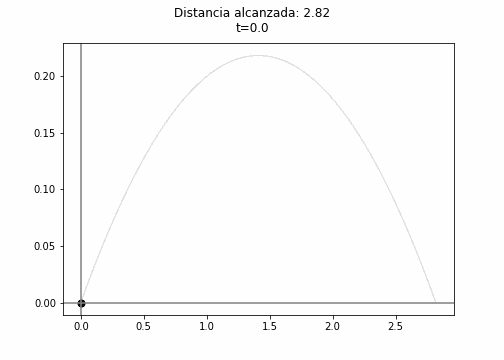

In [17]:
from IPython.display import Image

disparo = Shoot(v,theta)
print(f"El disparo alcanzó la distancia {disparo.distancia} m en {disparo.t_final} segundos")
disparo.graficar()

Image(open('shoot.gif','rb').read())

# Ejercicio

Encontrar el ángulo necesario para alcanzar una distancia de $1m$. El proyectil será lanzado con una velocidad de $v=4 m/s$, considera $g=9.81m/s^2$ y una tolerancia de $0.0001$.

1. Primero, usa cualquier método de encontrar raices que hemos implementado. Recuerda que puedes usar tu implementación o las implementaciones de la notebook de la práctica pasada.

In [28]:
from math import tan, cos, pi

g = 9.8
d = 1
v = 4

def f(theta):
    return d*tan(theta)-g*d**2/(2*(v**2)*(cos(theta)**2))

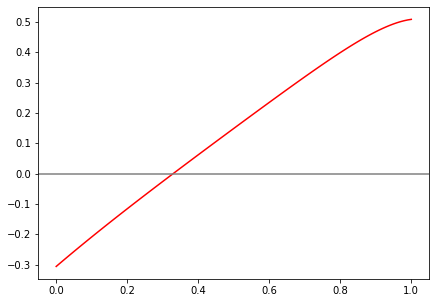

In [29]:
graficar(f,0,1)

2. Ahora, usa también la implementación de `scipy`. 

[Documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)

In [30]:
from scipy import optimize

sol = optimize.root_scalar(f,               # función
                           bracket=,  # intervalo que contenga a la raiz 
                           method='bisect', # método para resolver
                           rtol=0.001)      # tolerancia

In [31]:
sol

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 12
           root: 0.329833984375